## 3. Forest Cover Type Dataset  
- Ensemble Learning with Feature Engineering

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>
<div style="text-align: right\"> Initial upload: 2021.9.24 </div>
<div style="text-align: right\"> Last update: 2021.9.24</div>

- 출처 : https://www.kaggle.com/moghazy/ensemble-learning-with-feature-engineering

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

from scipy.signal import find_peaks

In [2]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#4a4a4a',
          '#1a508b', '#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#54E346', '#ABCE74',
        '#d6b0b1', '#58391c', '#cdd0cb', '#ffb396', '#6930c3']
sns.color_palette(colors[:10])

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216)]

- Data Exploration and Analysis
- Feature Construction
- Feature Selection
- Choosing and Optmizing the Model

In [3]:
import os

In [4]:
os.listdir('./data/forest-cover-type-kernels-only/')

['sampleSubmission.csv', 'sample_submission.csv', 'test.csv', 'train.csv']

In [5]:
# import zipfile
# train_zip = zipfile.ZipFile('../input/train.csv.zip')
# test_zip = zipfile.ZipFile('../input/test.csv.zip')

# train = pd.read_csv(train_zip.open('train.csv'))
# test = pd.read_csv(test_zip.open('test.csv'))

In [6]:
train = pd.read_csv('./data/forest-cover-type-kernels-only/train.csv')
test = pd.read_csv('./data/forest-cover-type-kernels-only/test.csv')

In [7]:
# The following two lines determines the number of visible columns and 
#the number of visible rows for dataframes and that doesn't affect the code
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### EDA

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [9]:
train.shape

(15120, 56)

In [10]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [11]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [12]:
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


<AxesSubplot:>

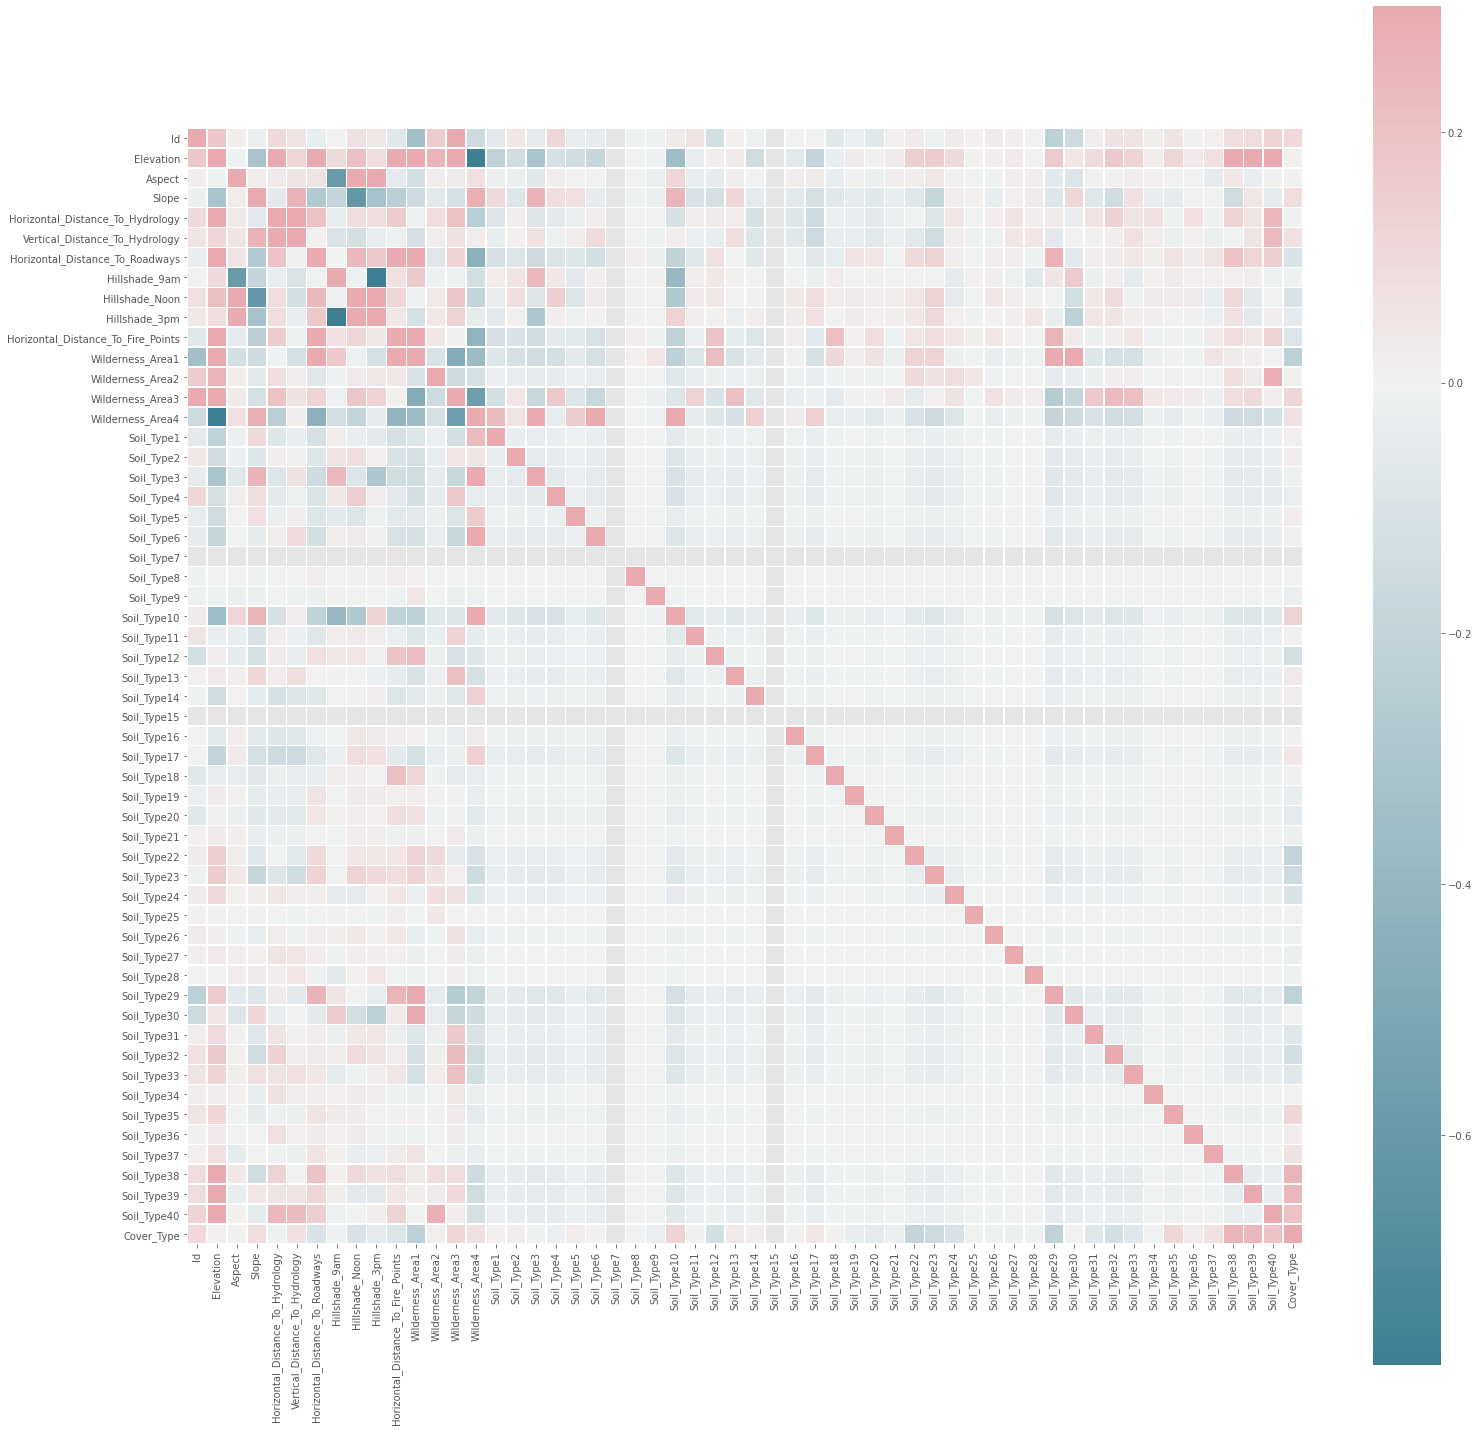

In [13]:
corr = train.corr()
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

In [14]:
corr

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,1.000000,0.185496,0.017702,-0.020168,0.099637,0.055348,-0.033028,0.000786,0.073123,0.042524,-0.068739,-0.339861,0.158484,0.384219,-0.158451,-0.058451,0.045545,-0.045757,0.118214,-0.041713,-0.046017,NaN,-0.013159,-0.014219,0.032292,0.063372,-0.129930,0.015145,-0.016034,NaN,-0.003794,-0.002940,-0.070252,-0.029707,-0.069537,0.014734,0.035739,-0.017422,0.034019,0.005675,0.031176,0.024141,-0.005104,-0.231780,-0.157515,0.025826,0.068048,0.066887,0.022520,0.057480,0.009110,0.016040,0.086932,0.083376,0.122475,0.108363
Elevation,0.185496,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563,0.330417,0.261729,0.354025,-0.783651,-0.218818,-0.147947,-0.307523,-0.125342,-0.141478,-0.187354,NaN,0.002934,-0.010571,-0.357816,-0.037906,0.017432,0.039304,-0.140619,NaN,-0.066252,-0.200663,-0.035173,0.029808,0.008548,0.032509,0.146236,0.159872,0.097647,0.010586,0.020669,0.040019,-0.001077,0.165304,0.048204,0.093191,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Aspect,0.017702,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169,-0.131262,0.028238,0.032578,0.075228,-0.024538,-0.020970,-0.069120,0.018019,0.000343,-0.006066,NaN,0.001723,-0.019391,0.111959,-0.034549,-0.044142,0.024312,0.001181,NaN,0.027121,0.029870,-0.042140,0.007570,-0.023330,0.018815,0.022301,0.041880,0.005480,-0.002340,-0.009775,0.018986,0.026330,-0.063428,-0.086897,0.008160,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015
Slope,-0.020168,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527,-0.152820,-0.065923,-0.113033,0.286985,0.099355,-0.081498,0.265541,0.087841,0.074720,-0.047868,NaN,-0.012989,-0.022220,0.255804,-0.109798,-0.115088,0.119863,-0.054085,NaN,-0.064321,-0.124375,-0.069326,-0.047742,-0.068508,-0.033935,-0.076393,-0.184528,0.017982,0.011062,-0.030700,0.012295,0.036082,-0.083108,0.118725,-0.076851,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.099637,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817,-0.009402,0.087484,0.200532,-0.239303,-0.084766,0.024234,-0.089578,-0.059398,-0.025247,0.021203,NaN,0.002819,-0.005523,-0.112852,0.026150,0.034306,0.026595,-0.111878,NaN,-0.084804,-0.159717,-0.018282,-0.033946,-0.062873,-0.025207,-0.007840,-0.087963,0.046915,-0.004615,0.027879,0.064616,0.019663,0.033854,-0.032540,0.060886,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.055348,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048,-0.117835,0.017108,0.069884,0.027321,-0.034309,0.005436,0.070414,-0.016543,0.018550,0.094701,NaN,-0.007049,-0.014610,0.018305,-0.029364,-0.033237,0.085309,-0.087445,NaN,-0.070201,-0.155574,-0.039745,-0.040898,-0.065710,-0.022197,-0.064122,-0.144317,0.017148,-0.011697,-0.016315,0.047304,0.046287,-0.056267,-0.000083,0.006247,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,-0.033028,0.578659

soil_Type7, soil_Type15는 상관성이 없어서 제외하기로 함  
Soil_Type9, Soil_Type36, Soil_Type27, Soil_Type25, Soil_Type8 도 상관도가 약하지만 다른 컬럼과 조합되어서 좋은 영향을 미칠 수 있으므로 그대로 둔다.

In [15]:
train.drop(['Id'], inplace = True, axis = 1 )
train.drop(['Soil_Type15' , "Soil_Type7"], inplace = True, axis = 1 )
test.drop(['Soil_Type15' , "Soil_Type7"], inplace = True, axis = 1 )

In [16]:
classes = np.array(list(train['Cover_Type'].values))

In [17]:
classes

array([5, 5, 2, ..., 3, 3, 3], dtype=int64)

In [18]:
def plotRelation(first_feature, sec_feature):
    
    plt.scatter(first_feature, sec_feature, c = classes, s=10)
    plt.xlabel(first_feature.name)
    plt.ylabel(sec_feature.name)

In [19]:
train['Cover_Type'].name

'Cover_Type'

나중에 알고리즘을 통해 조합할 피처들 간의 상관성을 살펴보자

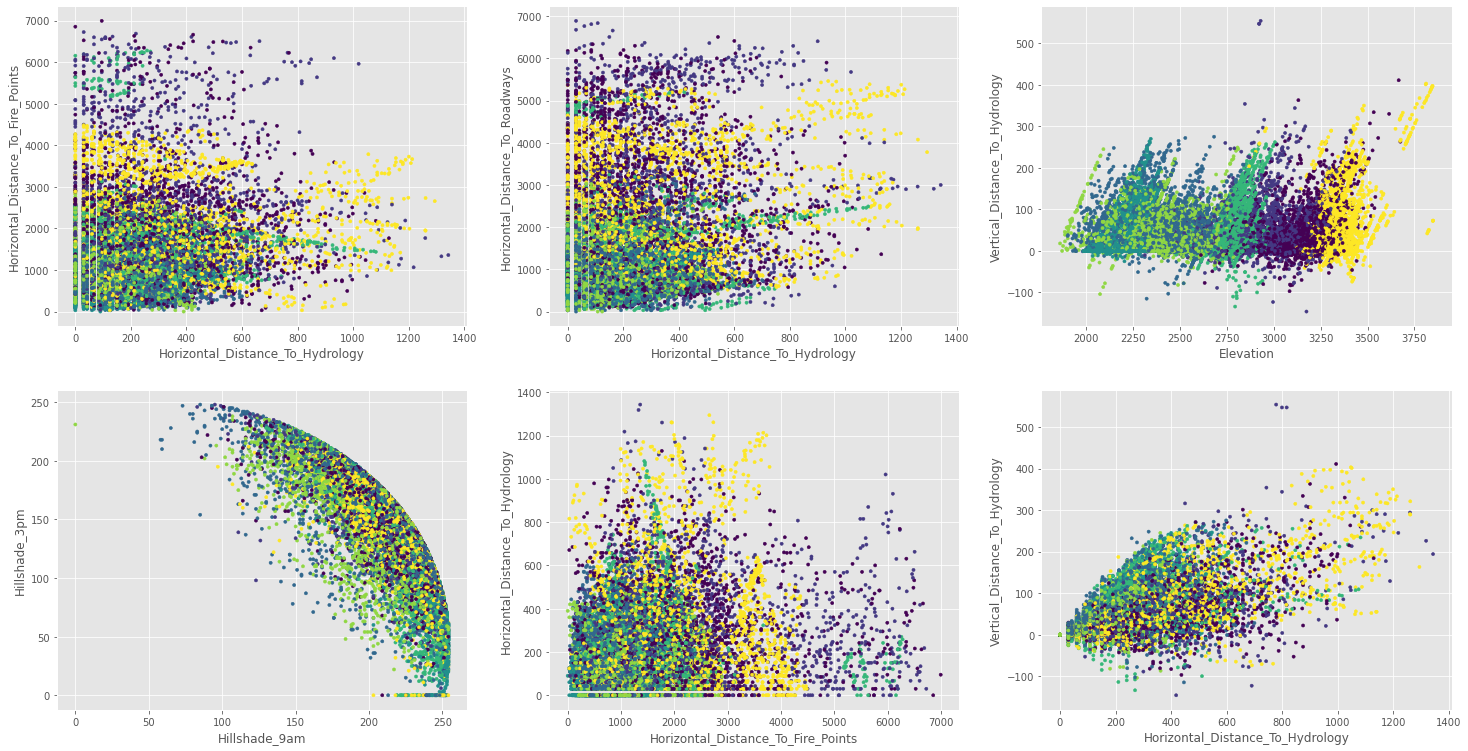

In [20]:
f = plt.figure(figsize=(25,20))
f.add_subplot(331)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Horizontal_Distance_To_Fire_Points)
f.add_subplot(332)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Horizontal_Distance_To_Roadways)
f.add_subplot(333)
plotRelation(train.Elevation, train.Vertical_Distance_To_Hydrology)
f.add_subplot(334)
plotRelation(train.Hillshade_9am, train.Hillshade_3pm)
f.add_subplot(335)
plotRelation(train.Horizontal_Distance_To_Fire_Points, train.Horizontal_Distance_To_Hydrology)
f.add_subplot(336)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Vertical_Distance_To_Hydrology)

### Feature Construction

corr mat와 plot에서 볼수있듯이 ...  
피처를 추가하고자 함..
수직거리에 일부 음수가 포함되어 있는데, 절대 값으로 표현할 때 성능이 더 좋은 것으로 확인됨.  
tree 기반 모델은 수직, 수평선만 사용하므로 비스듬하고 기울어진 기능을 엔지니어링 하는 것이 중요하다.???

In [21]:
train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type'],
      dtype

In [22]:
# train.head()
train['HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points'])
train['Neg_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])
train['HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])
train['Neg_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])
train['HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])
train['Neg_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])

train['Neg_Elevation_Vertical'] = train['Elevation']-train['Vertical_Distance_To_Hydrology']
train['Elevation_Vertical'] = train['Elevation']+train['Vertical_Distance_To_Hydrology']

train['mean_hillshade'] =  (train['Hillshade_9am']  + train['Hillshade_Noon'] + train['Hillshade_3pm'] ) / 3

train['Mean_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points'])/2
train['Mean_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])/2
train['Mean_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])/2

train['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])/2
train['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])/2
train['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])/2

train['Slope2'] = np.sqrt(train['Horizontal_Distance_To_Hydrology']**2+train['Vertical_Distance_To_Hydrology']**2)
train['Mean_Fire_Hydrology_Roadways']=(train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Hydrology'] + train['Horizontal_Distance_To_Roadways']) / 3
train['Mean_Fire_Hyd']=(train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Hydrology']) / 2 

train["Vertical_Distance_To_Hydrology"] = abs(train['Vertical_Distance_To_Hydrology'])

train['Neg_EHyd'] = train.Elevation-train.Horizontal_Distance_To_Hydrology*0.2


test['HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points'])
test['Neg_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])
test['HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])
test['Neg_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])
test['HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])
test['Neg_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])

test['Neg_Elevation_Vertical'] = test['Elevation']-test['Vertical_Distance_To_Hydrology']
test['Elevation_Vertical'] = test['Elevation'] + test['Vertical_Distance_To_Hydrology']

test['mean_hillshade'] = (test['Hillshade_9am']  + test['Hillshade_Noon']  + test['Hillshade_3pm'] ) / 3

test['Mean_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points'])/2
test['Mean_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])/2
test['Mean_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])/2

test['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])/2
test['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])/2
test['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])/2

test['Slope2'] = np.sqrt(test['Horizontal_Distance_To_Hydrology']**2+test['Vertical_Distance_To_Hydrology']**2)
test['Mean_Fire_Hydrology_Roadways']=(test['Horizontal_Distance_To_Fire_Points'] + test['Horizontal_Distance_To_Hydrology'] + test['Horizontal_Distance_To_Roadways']) / 3 
test['Mean_Fire_Hyd']=(test['Horizontal_Distance_To_Fire_Points'] + test['Horizontal_Distance_To_Hydrology']) / 2


test['Vertical_Distance_To_Hydrology'] = abs(test["Vertical_Distance_To_Hydrology"])

test['Neg_EHyd'] = test.Elevation-test.Horizontal_Distance_To_Hydrology*0.2

In [23]:
train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type', 'HorizontalH

In [24]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,HorizontalHydrology_HorizontalFire,Neg_HorizontalHydrology_HorizontalFire,HorizontalHydrology_HorizontalRoadways,Neg_HorizontalHydrology_HorizontalRoadways,HorizontalFire_Points_HorizontalRoadways,Neg_HorizontalFire_Points_HorizontalRoadways,Neg_Elevation_Vertical,Elevation_Vertical,mean_hillshade,Mean_HorizontalHydrology_HorizontalFire,Mean_HorizontalHydrology_HorizontalRoadways,Mean_HorizontalFire_Points_HorizontalRoadways,MeanNeg_Mean_HorizontalHydrology_HorizontalFire,MeanNeg_HorizontalHydrology_HorizontalRoadways,MeanNeg_HorizontalFire_Points_HorizontalRoadways,Slope2,Mean_Fire_Hydrology_Roadways,Mean_Fire_Hyd,Neg_EHyd
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,6537,-6021,768,-252,6789,5769,2596,2596,200.333333,3268.5,384.0,3394.5,-3010.5,-126.0,2884.5,258.000000,2349.000000,3268.5,2544.4
1,2590,56,2,212,6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,6437,-6013,602,-178,6615,5835,2596,2584,202.000000,3218.5,301.0,3307.5,-3006.5,-89.0,2917.5,212.084889,2275.666667,3218.5,2547.6
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6389,-5853,3448,-2912,9301,2941,2739,2869,202.333333,3194.5,1724.0,4650.5,-2926.5,-1456.0,1470.5,275.769832,3189.666667,3194.5,2750.4
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,6453,-5969,3332,-2848,9301,3121,2667,2903,199.333333,3226.5,1666.0,4650.5,-2984.5,-1424.0,1560.5,269.235956,3181.000000,3226.5,2736.6
4,2595,45,2,153,1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,6325,-6019,544,-238,6563,5781,2596,2594,201.333333,3162.5,272.0,3281.5,-3009.5,-119.0,2890.5,153.003268,2238.666667,3162.5,2564.4


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = train.drop(['Cover_Type'], axis = 1)
y = train['Cover_Type']

In [27]:
X_train, X_test, y_train, y_test = train_test_split( X.values, y.values, test_size=0.05, random_state=42 )

In [28]:
print(X_train.shape)
print(X_test.shape)

(14364, 71)
(756, 71)


타겟이 balanced 상태인지 보는 것이 중요하다.  
데이터가 skewed된 상태이면 성능지표료 accuracy만 봐서는 안된다. F, precision, recall 함께봐야...


In [29]:
unique, count = np.unique(y_train, return_counts=True)
print(unique)
print(count)

[1 2 3 4 5 6 7]
[2047 2057 2036 2071 2048 2061 2044]


In [30]:
print("The number of occurances of each class in the dataset = %s " % dict (zip(unique, count) ), "\n" )

The number of occurances of each class in the dataset = {1: 2047, 2: 2057, 3: 2036, 4: 2071, 5: 2048, 6: 2061, 7: 2044}  



- 그런데 위의 경우에는 데이터가 거의 balance로 봐도 될 듯  
- 따라서 성능지표 accuracy로 봐도 될 듯

### Feature Selection

새 피처가 추가되면 확연한 변화가 모델에 가해지는지 살펴보고, 그 피처가 얼마나 중요한지 보자.
이 것은 feature importance로 확인할 수 있다.

In [31]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [32]:
dataset = datasets.load_iris()
clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)

ExtraTreesClassifier()

In [33]:
z = clf.feature_importances_
df = pd.DataFrame()
print(len(z))
print(len(list(X.columns.values)))

71
71


In [34]:
df['values'] = z
df['column'] = list(X.columns.values)

In [35]:
df.head()

,values,column
0,0.072913,Elevation
1,0.019248,Aspect
2,0.013682,Slope
3,0.020655,Horizontal_Distance_To_Hydrology
4,0.018216,Vertical_Distance_To_Hydrology


In [36]:
df = df.sort_values(by = 'values', ascending= False)

In [37]:
df.head()

,values,column
58,0.076849,Neg_Elevation_Vertical
70,0.073575,Neg_EHyd
0,0.072913,Elevation
59,0.049300,Elevation_Vertical
13,0.042183,Wilderness_Area4


When using ExtraTrees or even any machine learning algorithm it is very important to remember to perform feature scaling to make the model converge faster. Also if you plan to use SVM classifier it would perform better with compression techniques like PCA 

스케일링

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Choosing and Optimizing the Model

하이퍼파라미터 튜닝을 위해 그리드서치 적용

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#uncomment the commented code and uncomment the commented to perform gridsearchCV
from xgboost import XGBClassifier

먼저 그냥 모델 학습

In [40]:
clf = ExtraTreesClassifier(n_estimators=950, random_state=0)

clf.fit(X_train, y_train)
print('Accuracy of classifier on training set: {:.2f}'.format(clf.score(X_train, y_train) * 100))
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(X_test, y_test) * 100))

Accuracy of classifier on training set: 100.00
Accuracy of classifier on test set: 92.72


그리드 서치

In [41]:
n_estimators = np.linspace(start = 600 , stop = 1000, num = 8, dtype= int )
n_estimators = [500, 550, 600, 650, 700, 750, 800 , 850, 900, 950]

param_grid = {'n_estimators': n_estimators}
grid = GridSearchCV(clf, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'n_estimators': 500} with a score of 90
Best estimator accuracy on test set 92.59 


이제 test 데이터에 대한 결과를 저장한다.

In [42]:
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,HorizontalHydrology_HorizontalFire,Neg_HorizontalHydrology_HorizontalFire,HorizontalHydrology_HorizontalRoadways,Neg_HorizontalHydrology_HorizontalRoadways,HorizontalFire_Points_HorizontalRoadways,Neg_HorizontalFire_Points_HorizontalRoadways,Neg_Elevation_Vertical,Elevation_Vertical,mean_hillshade,Mean_HorizontalHydrology_HorizontalFire,Mean_HorizontalHydrology_HorizontalRoadways,Mean_HorizontalFire_Points_HorizontalRoadways,MeanNeg_Mean_HorizontalHydrology_HorizontalFire,MeanNeg_HorizontalHydrology_HorizontalRoadways,MeanNeg_HorizontalFire_Points_HorizontalRoadways,Slope2,Mean_Fire_Hydrology_Roadways,Mean_Fire_Hyd,Neg_EHyd
0,15121,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6645,-6645,2684,-2684,9329,3961,2680,2680,188.666667,3322.5,1342.0,4664.5,-3322.5,-1342.0,1980.5,0.0,3109.666667,3322.5,2680.0
1,15122,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6675,-6675,2654,-2654,9329,4021,2683,2683,189.666667,3337.5,1327.0,4664.5,-3337.5,-1327.0,2010.5,0.0,3109.666667,3337.5,2683.0
2,15123,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6344,-6344,2980,-2980,9324,3364,2713,2713,183.666667,3172.0,1490.0,4662.0,-3172.0,-1490.0,1682.0,0.0,3108.000000,3172.0,2713.0
3,15124,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6374,-6374,2950,-2950,9324,3424,2709,2709,178.000000,3187.0,1475.0,4662.0,-3187.0,-1475.0,1712.0,0.0,3108.000000,3187.0,2709.0
4,15125,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6404,-6404,2920,-2920,9324,3484,2706,2706,173.333333,3202.0,1460.0,4662.0,-3202.0,-1460.0,1742.0,0.0,3108.000000,3202.0,2706.0


In [43]:
id = test['Id']

In [44]:
id

0          15121
1          15122
2          15123
3          15124
4          15125
           ...  
565887    581008
565888    581009
565889    581010
565890    581011
565891    581012
Name: Id, Length: 565892, dtype: int64

In [45]:
test = test.drop(['Id'], axis = 1)

In [46]:
test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,HorizontalHydrology_HorizontalFire,Neg_HorizontalHydrology_HorizontalFire,HorizontalHydrology_HorizontalRoadways,Neg_HorizontalHydrology_HorizontalRoadways,HorizontalFire_Points_HorizontalRoadways,Neg_HorizontalFire_Points_HorizontalRoadways,Neg_Elevation_Vertical,Elevation_Vertical,mean_hillshade,Mean_HorizontalHydrology_HorizontalFire,Mean_HorizontalHydrology_HorizontalRoadways,Mean_HorizontalFire_Points_HorizontalRoadways,MeanNeg_Mean_HorizontalHydrology_HorizontalFire,MeanNeg_HorizontalHydrology_HorizontalRoadways,MeanNeg_HorizontalFire_Points_HorizontalRoadways,Slope2,Mean_Fire_Hydrology_Roadways,Mean_Fire_Hyd,Neg_EHyd
0,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6645,-6645,2684,-2684,9329,3961,2680,2680,188.666667,3322.5,1342.0,4664.5,-3322.5,-1342.0,1980.5,0.0,3109.666667,3322.5,2680.0
1,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6675,-6675,2654,-2654,9329,4021,2683,2683,189.666667,3337.5,1327.0,4664.5,-3337.5,-1327.0,2010.5,0.0,3109.666667,3337.5,2683.0
2,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6344,-6344,2980,-2980,9324,3364,2713,2713,183.666667,3172.0,1490.0,4662.0,-3172.0,-1490.0,1682.0,0.0,3108.000000,3172.0,2713.0
3,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6374,-6374,2950,-2950,9324,3424,2709,2709,178.000000,3187.0,1475.0,4662.0,-3187.0,-1475.0,1712.0,0.0,3108.000000,3187.0,2709.0
4,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6404,-6404,2920,-2920,9324,3484,2706,2706,173.333333,3202.0,1460.0,4662.0,-3202.0,-1460.0,1742.0,0.0,3108.000000,3202.0,2706.0


In [47]:
test = scaler.transform(test)

In [51]:
pred = clf.predict(test)

In [53]:
out = pd.DataFrame()
out['Id'] = id
out['Cover_Type'] = pred
out.to_csv('data/forest-cover-type-kernels-only/my_submission.csv', index=False)
out.head(5)

,Id,Cover_Type
0,15121,1
1,15122,1
2,15123,1
3,15124,1
4,15125,1
